In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/absenteeism-at-work-uci-ml-repositiory/Absenteeism_at_work.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm

Reading in the data.

In [4]:
data = pd.read_csv('../input/absenteeism-at-work-uci-ml-repositiory/Absenteeism_at_work.csv', sep=';')

Getting a quick overview of the data.

In [5]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [6]:
data = data.rename(columns={'Reason for absence': 'Reason',
                           'Month of absence': 'Month',
                           'Day of the week': 'Day',
                           'Transportation expense': 'Travel_expense',
                           'Distance from Residence to Work': 'Distance',
                           'Service time': 'Years',
                           'Work load Average/day': 'Avg_work',
                           'Hit target': 'Work_target',
                           'Disciplinary failure': 'Disc_failure',
                           'Son': 'Child',
                           'Body mass index': 'BMI',
                           'Absenteeism time in hours': 'Missed_time'})

Renaming the columns for simplicity.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      740 non-null    int64  
 1   Reason                  740 non-null    int64  
 2   Month                   740 non-null    int64  
 3   Day                     740 non-null    int64  
 4   Seasons                 740 non-null    int64  
 5   Travel_expense          740 non-null    int64  
 6   Distance                740 non-null    int64  
 7   Years                   740 non-null    int64  
 8   Age                     740 non-null    int64  
 9   Work load Average/day   740 non-null    float64
 10  Work_target             740 non-null    int64  
 11  Disc_failure            740 non-null    int64  
 12  Education               740 non-null    int64  
 13  Child                   740 non-null    int64  
 14  Social drinker          740 non-null    in

Checking for NA and null values. I am also checking for the type of each column.

In [8]:
data.describe()

,ID,Reason,Month,Day,Seasons,Travel_expense,Distance,Years,Age,Work load Average/day,...,Disc_failure,Education,Child,Social drinker,Social smoker,Pet,Weight,Height,BMI,Missed_time
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Quick statistical overview of the data.

In [9]:
missing = data.isnull().sum()
missing

ID                        0
Reason                    0
Month                     0
Day                       0
Seasons                   0
Travel_expense            0
Distance                  0
Years                     0
Age                       0
Work load Average/day     0
Work_target               0
Disc_failure              0
Education                 0
Child                     0
Social drinker            0
Social smoker             0
Pet                       0
Weight                    0
Height                    0
BMI                       0
Missed_time               0
dtype: int64

In [10]:
sns.set_theme(style='darkgrid')

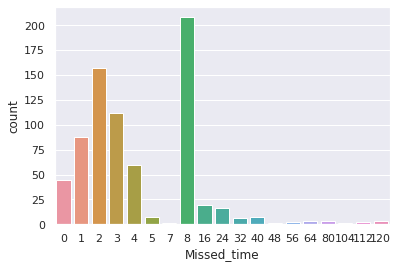

In [11]:
sns.countplot(x=data['Missed_time'])
plt.show()

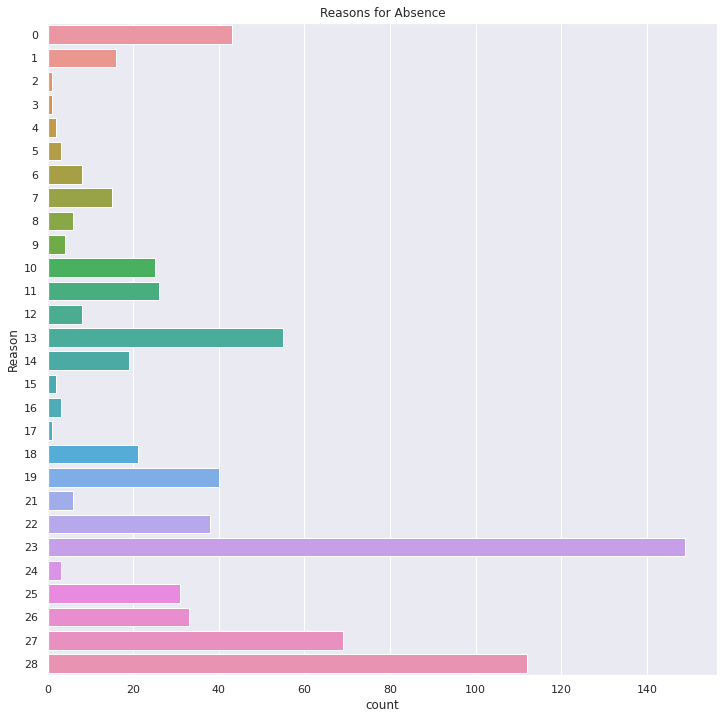

In [12]:
plt.figure(figsize=(12,12))
ax = sns.countplot(y=data['Reason'])
ax.set_title('Reasons for Absence')
plt.show()

Getting a quick count of all the possible reasons an employee could call out. From the graph, no one has used number 20, which is death. There is also a massive variance of which ones are used. Some are only used a couple of times across the 3 years while one is use almost 150 times.

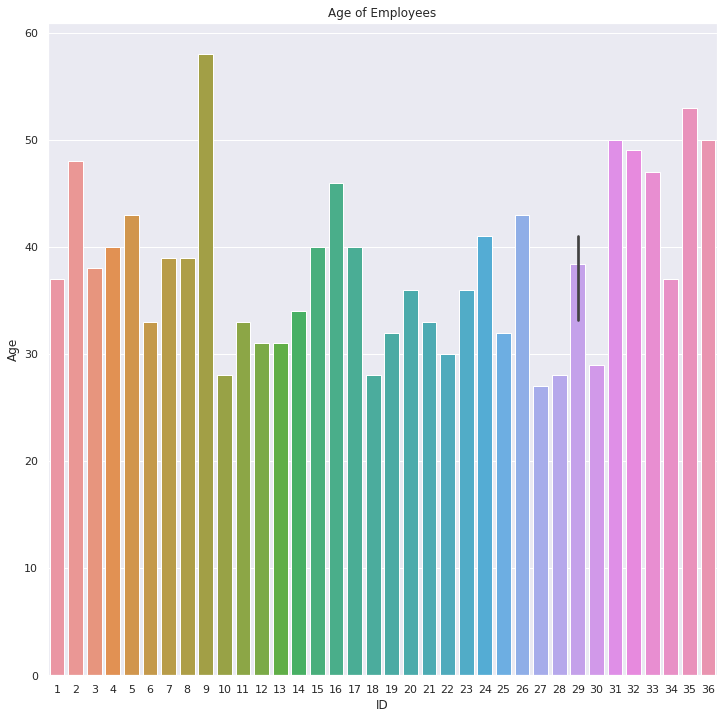

In [13]:
plt.figure(figsize=(12, 12))
ax= sns.barplot(x=data['ID'], y=data['Age'])
ax.set_title('Age of Employees')
plt.show()

Getting the ages of all the different employees. Something happened with employee 29 as they are the only one with a range bar. Perhaps they resued an employee number?

<AxesSubplot:xlabel='Day', ylabel='Missed_time'>

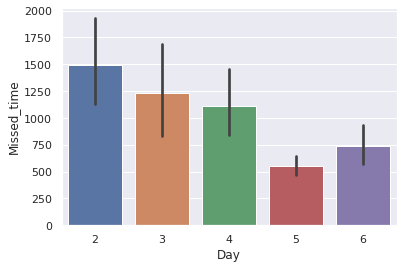

In [14]:
sns.barplot(x=data['Day'], y=data['Missed_time'], estimator=sum)

Monday had the greatest amount of missed time while Thursday had the least.

<AxesSubplot:xlabel='count', ylabel='Month'>

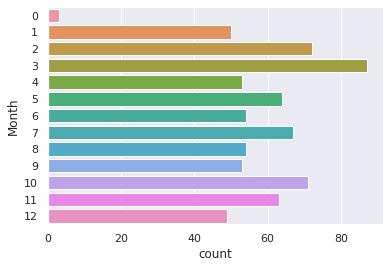

In [15]:
sns.countplot(y=data['Month'])

There were more sick days taken in March than any other month. Perhaps a local holiday?

<AxesSubplot:xlabel='ID', ylabel='Missed_time'>

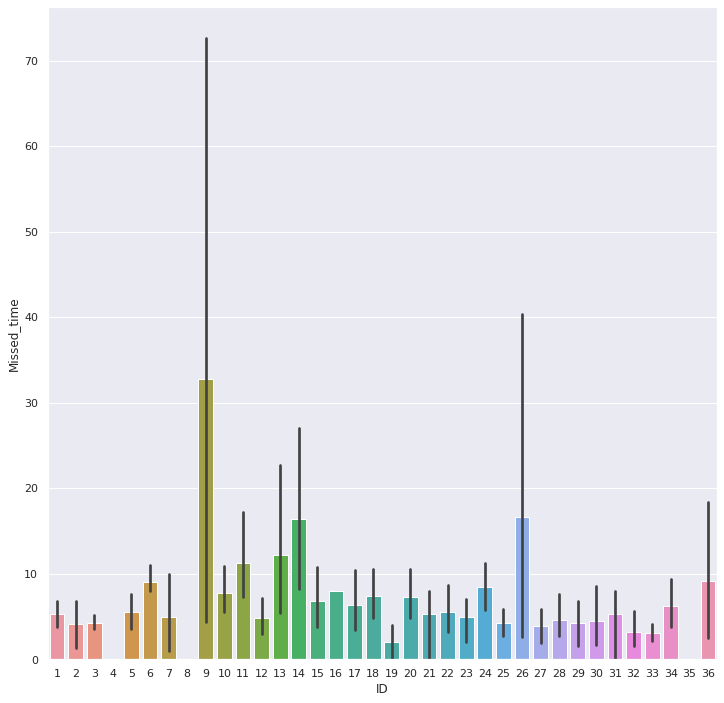

In [16]:
plt.figure(figsize=(12,12))
sns.barplot(x=data['ID'], y=data['Missed_time'])

Employees 4, 8 and 35 have not taken any time off. 

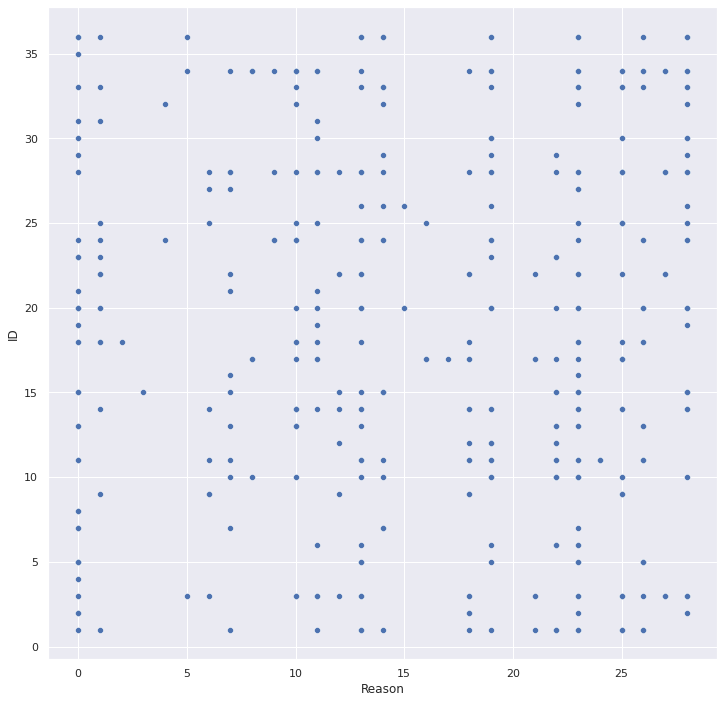

In [17]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=data['Reason'], y=data['ID'])
plt.show()

Showing each of the reasons each employee called out.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Reason', ylabel='Missed_time'>

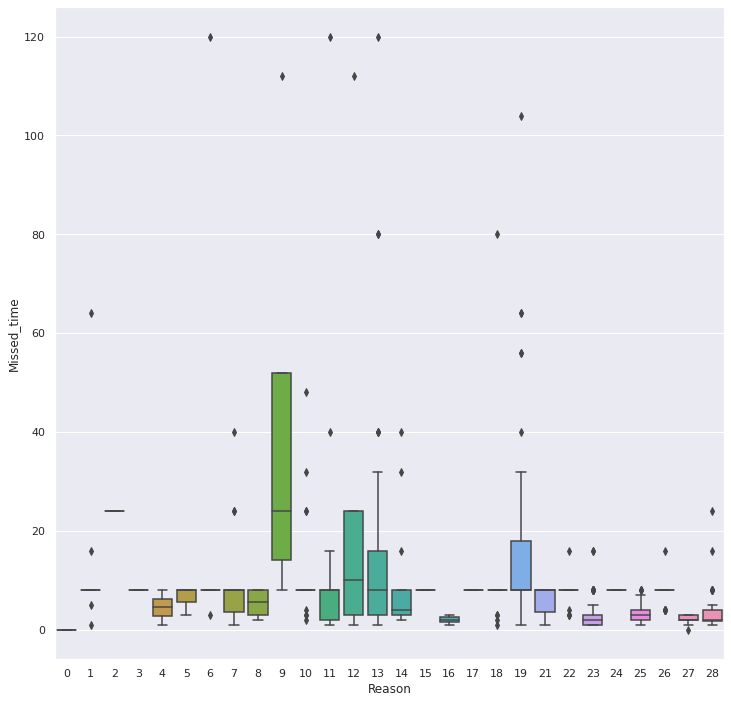

In [18]:
plt.figure(figsize=(12,12))
sns.boxplot(data['Reason'], data['Missed_time'])

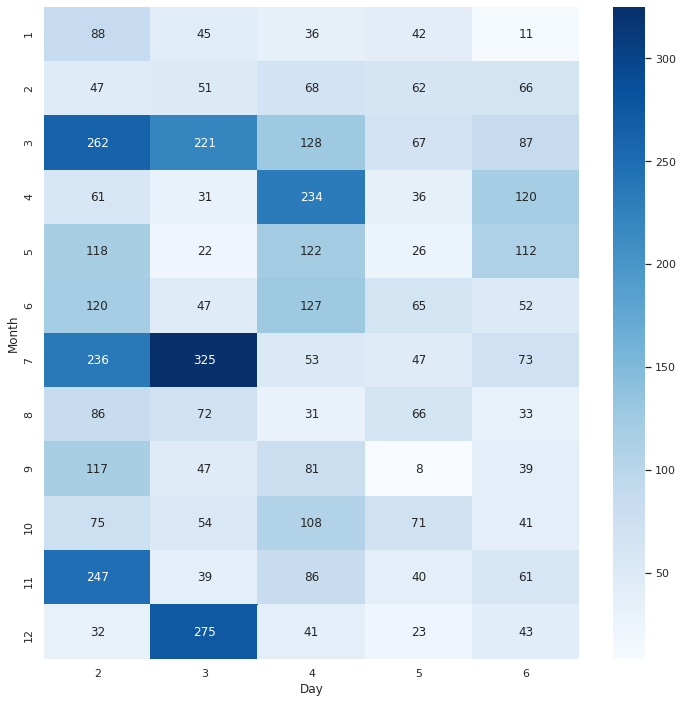

In [19]:
correlation_heatmap = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data.groupby(['Month', 'Day'])['Missed_time'].sum().unstack()[1:13],
            annot=True, fmt ='g', cmap='Blues')
plt.show()

Seeing the correlation between Month and Day. 

In [20]:
!pip install --upgrade kneed

Clustering!

In [21]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [22]:
features = data.drop(['ID', 'Reason'], axis=1)
original_label = data['Reason']

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data

array([[ 0.19676258, -0.64394734, -1.3901746 , ..., -0.01904601,
         0.77593223, -0.21951111],
       [ 0.19676258, -0.64394734, -1.3901746 , ...,  0.97582783,
         1.00943766, -0.51976661],
       [ 0.19676258,  0.0599242 , -1.3901746 , ..., -0.35067062,
         1.00943766, -0.36963886],
       ...,
       [-1.84169773, -0.64394734, -1.3901746 , ..., -0.35067062,
         1.70995395, -0.51976661],
       [-1.84169773,  0.0599242 , -0.49014905, ..., -0.35067062,
         1.94345938, -0.51976661],
       [-1.84169773,  1.46766727,  0.4098765 , ...,  0.47839091,
        -0.39159492, -0.51976661]])

In [24]:
from sklearn.decomposition import PCA
pca = PCA(2)
df_pca = pca.fit_transform(scaled_data)

df_pca.shape

(740, 2)

In [25]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 137
}

sse= []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

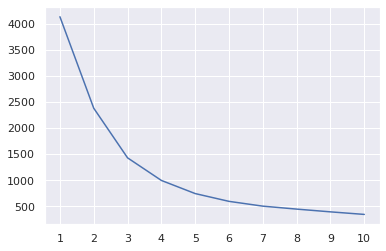

In [26]:
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.show()

In [27]:
kmeans = KMeans(init ='random', n_clusters=3,
               n_init=10, max_iter=300, random_state=137)

In [28]:
label = kmeans.fit_predict(df_pca)
label

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1,

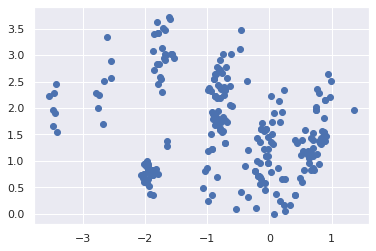

In [29]:
filtered_label0 = df_pca[label == 0]
plt.scatter(filtered_label0[:,0], filtered_label0[:,1])
plt.show()

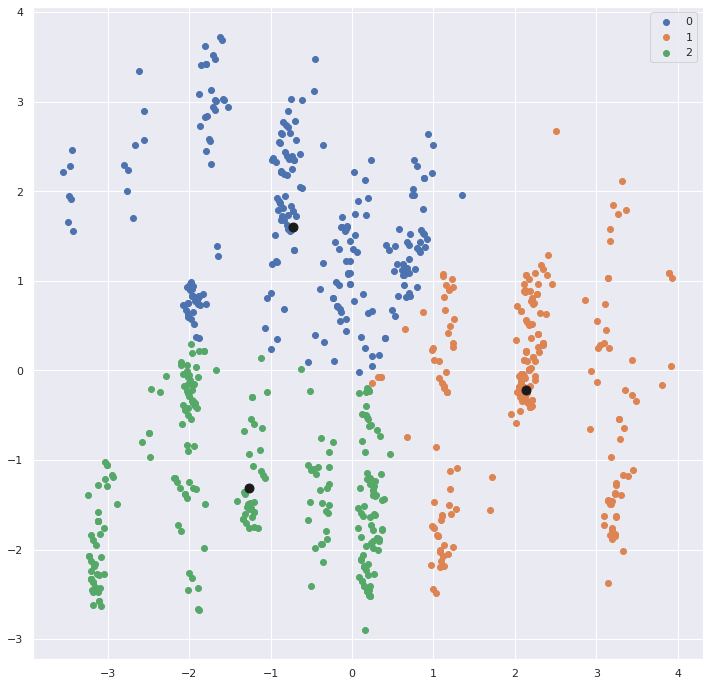

In [30]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
ax = plt
ax.figure(figsize=(12,12))
for i in u_labels:
    plt.scatter(df_pca[label==i, 0], df_pca[label == i, 1], label=i)
ax.scatter(centroids[:,0], centroids[:,1], s=80, color='k')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label, original_label)

cm_df = pd.DataFrame(cm)
cm_df.to_csv('cm_df.csv')

Since the knee was shown to be 3 clusters, I produced the 3 clusters just above with their centroids.

In [32]:
final_data = data.drop(['ID'], axis=1)
X = final_data.drop(['Reason'], axis=1)
y = final_data['Reason']

Beginning to run through the various models. And trying to get a baseline for each model.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=137)

In [34]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
pred_nb = gnb.predict(X_test)

print('Accuracy : {}'.format(accuracy_score(y_test, pred_nb)))

Accuracy : 0.2882882882882883


In [35]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print('Accuracy : {}'.format(accuracy_score(y_test, pred_rf)))

Accuracy : 0.4774774774774775


In [37]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)

print('Accuracy : {}'.format(accuracy_score(y_test, pred_knn)))

Accuracy : 0.36036036036036034


In [38]:
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)
pred_svm = svm_clf.predict(X_test)



In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

print('Accuracy : {}'.format(accuracy_score(y_test, pred_gb)))

Accuracy : 0.42792792792792794


None of the models perform that well.

Seeing how keras can deal with this dataset.

In [40]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

labels= data['Reason']
features = data.iloc[:, 2:20]

In [41]:
X=features
y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=137)

In [42]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = Sequential()

model.add(Dense(6, activation='sigmoid', input_shape=(18,)))

model.add(Dense(6, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
592/592 [==============================] - 1s 1ms/step - loss: -3247.1900 - accuracy: 0.0318
Epoch 2/10
592/592 [==============================] - 1s 1ms/step - loss: -17264.9112 - accuracy: 0.0184
Epoch 3/10
592/592 [==============================] - 1s 991us/step - loss: -30811.9941 - accuracy: 0.0253
Epoch 4/10
592/592 [==============================] - 1s 1ms/step - loss: -44820.0238 - accuracy: 0.0086
Epoch 5/10
592/592 [==============================] - 1s 994us/step - loss: -57299.6718 - accuracy: 0.0181
Epoch 6/10
592/592 [==============================] - 1s 930us/step - loss: -70935.5751 - accuracy: 0.0229
Epoch 7/10
592/592 [==============================] - 1s 982us/step - loss: -82867.2173 - accuracy: 0.0253
Epoch 8/10
592/592 [==============================] - 1s 1ms/step - loss: -97990.4666 - accuracy: 0.0223
Epoch 9/10
592/592 [==============================] - 1s 1ms/step - loss: -112663.1621 - accuracy: 0.0250
Epoch 10/10
592/592 [==========================

In [44]:
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test, verbose=1)

print(score)

5/5 [==============================] - 0s 2ms/step - loss: -140183.1094 - accuracy: 0.0270
[-140183.109375, 0.027027027681469917]


Attempting to optimize

In [45]:
data_2 = final_data
data_2 = data_2.drop(['Missed_time'], axis = 1)

In [46]:
X = data_2.drop(['Reason'], axis=1)
y = data_2['Reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=137)

In [47]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print('Accuracy : {}'.format(accuracy_score(y_test, pred_rf)))

Accuracy : 0.4189189189189189


Removing missed time made the model worse!

In [48]:
data['Reason'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
12      8
6       8
8       6
21      6
9       4
24      3
5       3
16      3
15      2
4       2
3       1
17      1
2       1
Name: Reason, dtype: int64

I am going to remove all the rows with reasons that are less than 10 instances over 3 years.

In [49]:
data['Missed_time'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
48       1
104      1
Name: Missed_time, dtype: int64

In [50]:
data_to_drop = (data['Reason'].value_counts() < 10).index
print(data_to_drop[:15])
to_drop = data_to_drop[15:]

Int64Index([23, 28, 27, 13, 0, 19, 22, 26, 25, 11, 10, 18, 14, 1, 7], dtype='int64')


In [51]:
ans = [y for x,y in data.groupby('Reason', as_index=False)]

In [52]:
ans[3]

,ID,Reason,Month,Day,Seasons,Travel_expense,Distance,Years,Age,Work load Average/day,...,Disc_failure,Education,Child,Social drinker,Social smoker,Pet,Weight,Height,BMI,Missed_time
364,15,3,1,4,2,291,31,12,40,330.061,...,0,1,1,1,0,1,73,171,25,8


In [53]:
que = ans[1].append(ans[0])
que = que.append(ans[22])
que = que.append(ans[27])
que = que.append(ans[26])
que = que.append(ans[13])
que = que.append(ans[19])
que = que.append(ans[21])
que = que.append(ans[25])
que = que.append(ans[24])
que = que.append(ans[11])
que = que.append(ans[10])
que = que.append(ans[18])
que = que.append(ans[14])
que = que.append(ans[7])

Building the last and final dataframe.

In [54]:
que.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 10 to 706
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      692 non-null    int64  
 1   Reason                  692 non-null    int64  
 2   Month                   692 non-null    int64  
 3   Day                     692 non-null    int64  
 4   Seasons                 692 non-null    int64  
 5   Travel_expense          692 non-null    int64  
 6   Distance                692 non-null    int64  
 7   Years                   692 non-null    int64  
 8   Age                     692 non-null    int64  
 9   Work load Average/day   692 non-null    float64
 10  Work_target             692 non-null    int64  
 11  Disc_failure            692 non-null    int64  
 12  Education               692 non-null    int64  
 13  Child                   692 non-null    int64  
 14  Social drinker          692 non-null    i

In [55]:
que['Missed_time'].value_counts()

8      184
2      154
3      105
1       84
4       59
0       44
16      17
24      13
5        7
40       7
32       5
64       3
80       3
56       2
120      2
7        1
48       1
104      1
Name: Missed_time, dtype: int64

Making sure the dataframe looks the way I want it to.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


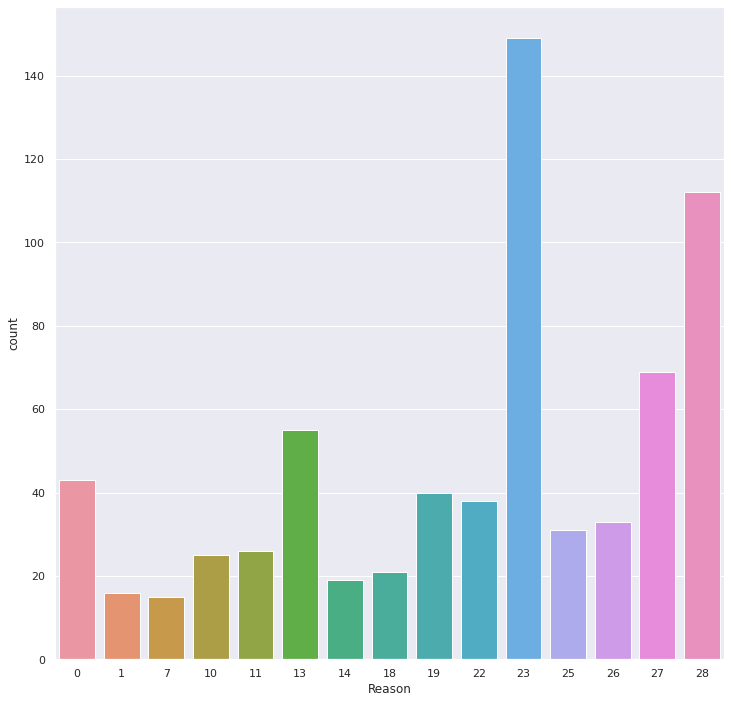

In [56]:
plt.figure(figsize=(12,12))
sns.countplot(que['Reason'])
plt.show()

It looks like it only has the reasons I want it to have!

In [57]:
X = que.drop(['Missed_time', 'ID'], axis=1)
y = que['Missed_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=137)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'RF': RandomForestClassifier(n_estimators=100, criterion='entropy'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': svm.SVC(),
    'NB': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators = 100, max_depth=4, learning_rate=0.05, criterion='mae')
}


for name, model in models.items():
    model = model.fit(X_train, y_train)
    model_predict= model.predict(X_test)
    print('Model : {} Accuracy : {}'.format(name, accuracy_score(y_test, model_predict)))

Model : RF Accuracy : 0.46153846153846156
Model : KNN Accuracy : 0.375
Model : SVM Accuracy : 0.49038461538461536
Model : NB Accuracy : 0.16346153846153846


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1122: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  "Boosting.", FutureWarning)


Model : Gradient Boosting Accuracy : 0.41346153846153844


Changing to trying to predict amount of time missed and running through the models again with the addition of gradient boosting.

One last time with deep learning.

In [58]:
labels= que['Missed_time']
features = que.iloc[:, 1:19]

X=features
y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=137)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
model = Sequential()

model.add(Dense(3, activation='sigmoid', input_shape=(18,)))

model.add(Dense(3, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
553/553 [==============================] - 1s 1ms/step - loss: -139.7560 - accuracy: 0.1259
Epoch 2/10
553/553 [==============================] - 1s 968us/step - loss: -738.9329 - accuracy: 0.1109
Epoch 3/10
553/553 [==============================] - 1s 994us/step - loss: -1310.4676 - accuracy: 0.0915
Epoch 4/10
553/553 [==============================] - 1s 1ms/step - loss: -2241.9060 - accuracy: 0.1527
Epoch 5/10
553/553 [==============================] - 1s 1ms/step - loss: -2505.8133 - accuracy: 0.1131
Epoch 6/10
553/553 [==============================] - 1s 997us/step - loss: -3518.0882 - accuracy: 0.1158
Epoch 7/10
553/553 [==============================] - 1s 999us/step - loss: -3845.4789 - accuracy: 0.1236
Epoch 8/10
553/553 [==============================] - 1s 1ms/step - loss: -5213.8986 - accuracy: 0.1068
Epoch 9/10
553/553 [==============================] - 1s 1ms/step - loss: -5293.0064 - accuracy: 0.1204
Epoch 10/10
553/553 [==============================] - 1s 

In [60]:
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test, verbose=1)

print(score)

5/5 [==============================] - 0s 2ms/step - loss: -6581.0063 - accuracy: 0.1511
[-6581.00634765625, 0.15107913315296173]
